<a href="https://colab.research.google.com/github/tuntul17/Others/blob/main/Copy_of_YOLO_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO 
import numpy as np
from pylab import * 
import shutil
import os
from bs4 import BeautifulSoup as BS
import requests as rq
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
if not os.path.exists("/content/sample_data/Img"):
  os.makedirs("/content/sample_data/Img")

In [ ]:
cls = ["car","truck","motorcyle"]

for V in cls:
  url1 = f"https://www.google.com/search?q={V}%20images%20on%20traffic&tbm=isch&tbs=isz:l&hl=en-US&sa=X&ved=0CAIQpwVqFwoTCMDlvIeWpP0CFQAAAAAdAAAAABAJ&biw=1903&bih=937"
  url2 = f"https://www.google.com/search?q={V}%20images&tbm=isch&hl=en-US&tbs=isz:l&sa=X&ved=0CAIQpwVqFwoTCNDJu6GWpP0CFQAAAAAdAAAAABAC&biw=1903&bih=937"
  req1 = rq.get(url1)
  req2 = rq.get(url2)

  soup1 = BS(req1.content,"html.parser")
  soup2 = BS(req2.content,"html.parser")

  tag1 = soup1.find_all('img')
  tag2 = soup2.find_all('img')

  ImgUrls =  [img["src"] for img in tag1]
  ImgUrls.extend(img["src"] for img in tag2)
  for i in range(len(ImgUrls)):
    if ImgUrls[i-2].__contains__("gif"):
      ImgUrls.pop(i-2)
  for i, url in enumerate(ImgUrls):
    R = rq.get(url)
    open(f'/content/sample_data/Img/{V}_{i+1}.jpg','wb').write(R.content)
    

In [ ]:
ts_rat = 5/40
if not os.path.exists("/content/sample_data/Data/Train/images"):
  os.makedirs("/content/sample_data/Data/Train/images")
if not os.path.exists("/content/sample_data/Data/Test/images"):
  os.makedirs("/content/sample_data/Data/Test/images")

V_hat = os.listdir("/content/sample_data/Img")
tr, ts = train_test_split(V_hat,test_size= ts_rat)

tr_path = "/content/sample_data/Data/Train/images"
ts_path = "/content/sample_data/Data/Test/images"

for image in tr:
  image_path = f"/content/sample_data/Img/{image}"
  shutil.move(image_path, tr_path)
 

for img in ts:
  img_path = f"/content/sample_data/Img/{img}"
  shutil.move(img_path,ts_path)
  

In [ ]:
os.makedirs("/content/sample_data/Data/Train/labels")
os.makedirs("/content/sample_data/Data/Test/labels")

In [ ]:
#switch back and forth between local pc and colab

import zipfile

# specify the path to the zip file and the directory to extract to
zip_path ="/content/Data.zip"
extract_path = '/content'
#/content/Data.zip
# create a ZipFile object and extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Car-Truck-motorcycles

Object Detection.

In [ ]:
model = YOLO("/content/yolov8n.pt")

d = '/content/model.yaml'
epoc = 100
batch = 4
res = model.train(data = d,epochs = epoc,batch=batch)

Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/model.yaml, epochs=100, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

In [ ]:
ts_mod = YOLO('/content/runs/detect/train5/weights/best.pt')

res = ts_mod.predict(source = 'https://static.birgun.net/resim/haber-detay-resim/2021/11/29/istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg',show=True,save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

Found https://static.birgun.net/resim/haber-detay-resim/2021/11/29/istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg locally at istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg
image 1/1 /content/istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg: 384x640 1 Car, 1 Motorcycle, 27.1ms
Speed: 0.4ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


Segmentation

In [ ]:
seg_mod = YOLO('yolov8n-seg.pt')

d = '/content/model.yaml'
epoc = 100
batch = 4

seg_res = model.train(data = d,epochs = epoc,batch=batch)


Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/model.yaml, epochs=100, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

In [ ]:
seg_modT = YOLO('/content/runs/detect/train6/weights/best.pt')

res = seg_modT.predict(source ='https://static.birgun.net/resim/haber-detay-resim/2021/11/29/istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg',show=True,save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

Found https://static.birgun.net/resim/haber-detay-resim/2021/11/29/istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg locally at istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg
image 1/1 /content/istanbul-da-firtina-bitene-kadar-motorsiklet-kullanimi-yasaklandi-949498-5.jpg: 384x640 1 Car, 1 Truck, 1 Motorcycle, 15.4ms
Speed: 0.4ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


The result: 





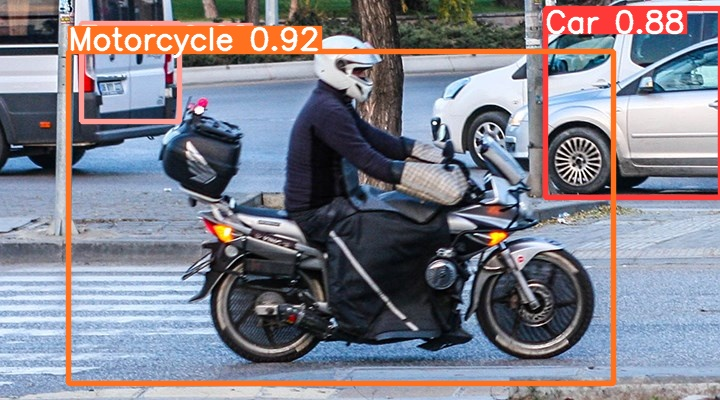

In [ ]:
!yolo detect train data = model.yaml model = /content/yolov8n.pt  epochs = 40

Ultralytics YOLOv8.0.42 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=model.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, s

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
#hand picked from web manually, fix this later!
results = model.predict(source = "/content/AA-27759222.jpg",show = True)
im1 = Image.open("/content/keciorende-bir-gunde-onlarca-tir-yardim-topladi-2-tir-ve-3-kamyon-yola-cikti-43w7TqNS.jpg")
im2 = Image.open("/content/AA-27759222.jpg")
im3 = Image.open("/content/photography-rudolf-van-der-ven-feature.jpg")

TS = [im1,im2,im3] #this somehow produce lower predictions compared to individual prediction of im1,2,3
results = model.predict(source = im3,save = True,save_txt = True) #not really needed to save labels but save it nonetheless

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.42 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/AA-27759222.jpg: 448x640 2 Cars, 1 Truck, 1 Motorcycle, 145.8ms
Speed: 1.1ms preprocess, 145.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 Car, 152.9ms
Speed: 0.9ms preprocess, 152.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8
1 label saved to runs/detect/predict8/labels


In [ ]:
#shutil.rmtree("/content/runs")